In [7]:
import matplotlib
import matplotlib.pyplot as plt

from data import GunshotForensicDataset

In [8]:
def print_opts(opts):
    """Prints the values of all command-line arguments.
    """
    print('=' * 80)
    print('Opts'.center(80))
    print('-' * 80)
    for key in opts.__dict__:
        print('{:>30}: {:<30}'.format(key, opts.__dict__[key]).center(80))
    print('=' * 80)


# Exploratory Data

In [9]:
full_dataset = GunshotForensicDataset(root="./",seq_duration=5.0)
mel, target = full_dataset[15]
target
mel.shape

/home/tommy/miniconda3/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (200) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([1, 200, 660])

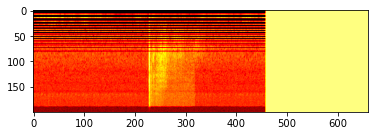

In [10]:
plt.figure()
plt.imshow(mel.squeeze().numpy(),cmap='hot')

In [11]:
data_np = data.numpy()[0]
plt.plot(data_np, '-', )

NameError: name 'data' is not defined

In [12]:
plt.figure(figsize=(16,4))
plt.plot(data_np[:500], '.')
plt.plot(data_np[:500], '-')

NameError: name 'data_np' is not defined

<Figure size 1152x288 with 0 Axes>

## Loading Data and Model

In [ ]:
batch_size = 8

In [86]:
import torch
import torch.nn as nn
from torch import optim

#Load Dataset
full_dataset = GunshotForensicDataset(root="./",seq_duration=3.0,n_mels=64)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
classes = full_dataset.features

#Load resnet
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
model.conv1 = nn.Conv2d(1, model.conv1.out_channels, kernel_size= model.conv1.kernel_size[0], stride=model.conv1.stride[0], padding=model.conv1.padding[0])

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(nn.Dropout(0.3),nn.Linear(num_ftrs, full_dataset.num_features))


Using cache found in /home/tommy/.cache/torch/hub/pytorch_vision_v0.9.0


In [87]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,shuffle=True)


In [88]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = .005, momentum = 0.9)
device = 'cuda'
model.to(device)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [ ]:
epochs = 10
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses = [],[]
for epoch in range(epochs):
    i = 0
    for data, target in train_loader:
        steps += 1
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss)
        running_loss += loss.item()
        if i % 10 == 0:    # print every 2000 mini-batches
            print(f'Epoch {epoch} at at iteration {i}, Loss: {loss}')
        i+= 1

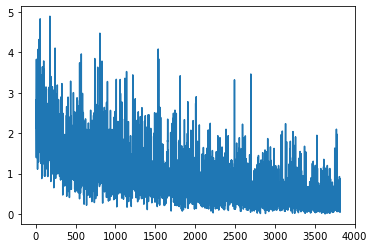

In [92]:
plt.plot(train_losses)

In [ ]:

correct = 0
incorrect = 0
for data, target in test_loader: 
    data = data.to(device)
    target = target.to(device)
    result = model(data).to(device)
    predicted = torch.argmax(result, dim = 1).to(device)
    num_correct = (predicted == target).sum()
    print(num_correct)
    correct += num_correct
    incorrect += (8-num_correct)


In [112]:
accuracy_rate = correct/(correct + incorrect)

print(f'Accuracy Rate {accuracy_rate}')

Accuracy Rate 0.7838541865348816
